/home/jmoc/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


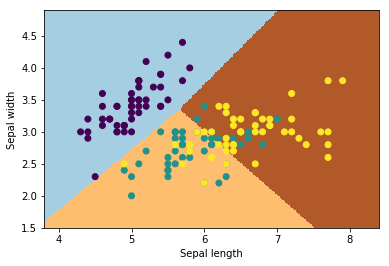

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn import cross_validation, metrics

# cargamos dataset
# obtenemos sólo las 2 primeras features
iris = datasets.load_iris()
X = iris.data[:, :2]  
Y = iris.target

model = linear_model.LogisticRegression(C=10000) # C = 1/alpha
model.fit(X, Y)

# Trazar el límite de decisión.  Para ello, asignaremos un color a cada 
# Punto en la malla [x_min, m_max]: [y_min, y_max] 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# pintar también los puntos de entrenamiento 
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Accuracy: 0.789474
Precision: 0.793651
F1: 0.793651


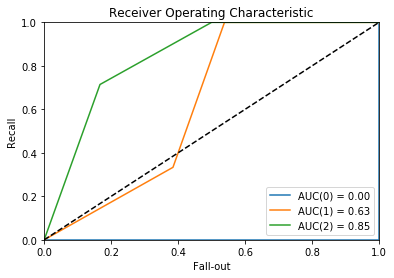

In [2]:
#Medimos lo bueno que es nuestro modelo dividiendo datos de entrenamiento y datos de prueba

x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, Y)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy: %2f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: %2f" % metrics.precision_score(y_test, y_pred, average="macro"))
print("F1: %2f" % metrics.f1_score(y_test, y_pred, average="macro"))
 
for label in np.arange(3):
    false_positive_rate, recall, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=label)
    roc_auc = metrics.auc(false_positive_rate, recall)
    plt.plot(false_positive_rate, recall, label='AUC(%d) = %0.2f' % (label, roc_auc))

plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()